<a href="https://colab.research.google.com/github/JamalMorales/PDI/blob/main/PR%C3%81CTICAS%20PDI/Pr%C3%A1ctica_5_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargamos la libreria de Github para tener acceso a nuestras imagenes primero**

In [1]:
!git clone https://github.com/JamalMorales/PDI.git
%cd PDI
!ls -R

Cloning into 'PDI'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 50 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 2.43 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/PDI
.:
 IMAGENES  'PRÁCTICAS PDI'   README.md

./IMAGENES:
contraste.jpg  flor.jpg  frutas.jpg  medica.jpg

'./PRÁCTICAS PDI':
Práctica_3_PDI.ipynb  Práctica_4_PDI.ipynb


# **Despues cargamos nuestro código correspondiente**

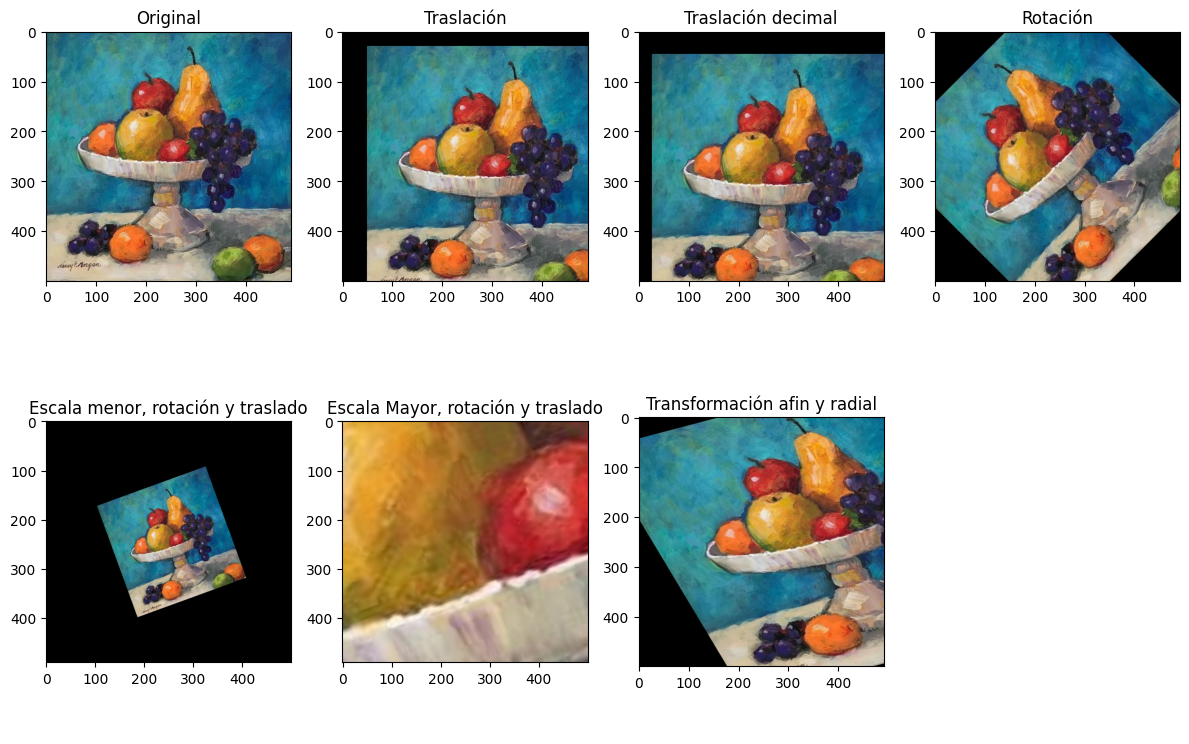

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Jamal Morales Sánchez 2064497
#Evelyn Rubí Martinez Ruiz 2071292
#Abigail Montserrat Nieto Solís 2059067
#Reynaldo Holsen Gallegos González	1963727
#Jesús Antonio Segura Vences	1851396

img = cv2.imread('IMAGENES/frutas.jpg')
img_col = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

#Traslación
M_trans = np.float32([[1, 0, 50], [0, 1, 30]])
img_trans = cv2.warpAffine(img_col, M_trans, (cols, rows))

#Traslación decima
M_dec = np.float32([[1, 0, 25.8], [0, 1, 45.9]])
img_dec = cv2.warpAffine(img_col, M_dec, (cols, rows))

#Traslación y rotación
M_rot = np.float32([[1, 0, 40], [0, 1, 20]])
N_rot = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
img_rot = cv2.warpAffine(img_col, N_rot, (cols, rows))

#Traslación, rotación y escalado
M_tre = np.float32([[1, 0, 30], [0, 1, 10]])
M_tras = cv2.warpAffine(img_col, M_tre, (rows, cols))
M_rot = cv2.getRotationMatrix2D((cols/2, rows/2), 20, .5)
M_final = cv2.warpAffine(M_tras, M_rot, (rows, cols))

N_tre = np.float32([[1, 0, 30], [0, 1, 10]])
N_tras = cv2.warpAffine(img_col, N_tre, (rows, cols))
N_rot = cv2.getRotationMatrix2D((cols/2, rows/2), 20, 5)
N_final = cv2.warpAffine(N_tras, N_rot, (rows, cols))

#Transformación afin y radial
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])
M = cv2.getAffineTransform(pts1,pts2)
img_tar = cv2.warpAffine(img_col, M, (cols, rows))

#Mostrar resultados
fig, axs = plt.subplots(2,4,figsize=(12,8))
axs[0,0].imshow(img_col); axs[0,0].set_title("Original")
axs[0,1].imshow(img_trans); axs[0,1].set_title("Traslación")
axs[0,2].imshow(img_dec); axs[0,2].set_title("Traslación decimal")
axs[0,3].imshow(img_rot); axs[0,3].set_title("Rotación")
axs[1,0].imshow(M_final); axs[1,0].set_title("Escala menor, rotación y traslado")
axs[1,1].imshow(N_final); axs[1,1].set_title("Escala Mayor, rotación y traslado")
axs[1,2].imshow(img_tar); axs[1,2].set_title("Transformación afin y radial")
axs[1,3].axis("off")

plt.tight_layout()
plt.show()